#  Exploratory Data Analysis for the  MTA Data


#### T5 Data Science Bootcamp



###### By batoul alosaimi
###### Email: batoulalotaibi7@gmail.com

#### Table of Contents:

<li><a id='Introduction'> Introduction</a></li>
<li><a id='Assumptions'> Assumptions</a></li>
<li><a id='Gather'> Part 1 - Gather</a></li>
<li><a id='Clean Data'>Part 2 - Clean Data </a></li>
<li><a id='Visualizing data'>Part 3 - Visualizing data </a></li>
<li><a id='Conclusion and recommendation
'>Conclusion and recommendation
</a></li>

## Introduction

This is the first project for the T5 Data Science Bootcamp, which is an exploratory data analysis of the MTA turnstile data set using SQL paired with Python and its libraries Pandas, NumPy, Matplotlib, and seaborn.

This exploratory analysis supports MTA turnstile's sanitizing company to help them improve their work schedule by estimating the number of sanitizing tours each station needs per day, based on their needs, with the busiest station requiring more than once a day. As I work on this issue, I will answer the questions below. 
><li>What are the most active stations?</li>
><li>What are the most active times for each station?</li>
><li>What are the most active days of the week?</li>
><li>What is the best schedule for the company?</li>

## Assumptions


<p>
<li><b>Time constraints:</b> In view of the current state, the spread of the COVID-19 epidemic, and the importance of continuing with the Preventive precautions, I assumed that the return to normal life while continuing the preventive measures to the Corona virus was at the beginning of 2021. Therefore I only pulled turnstile data for only those first three months.</li>
</p>

<p>
<li><b>Target Scale:</b> I didn't differentiate between "ENTRIES" and "EXITS" for the station, but instead relied on "TRAFFIC" to determine which station would have the most traffic at a given time, so we could organize more than one sanitizing tour per day.</li>
</p>
<p>
<li><b>Outlier Counts:</b>We can use boxplots to display and remove outliers on "TRAFFIC."</li>
</p>

## Part 1 - Gather


<li>Source :<a id='http://web.mta.info/developers/turnstile.html'> NYC MTA website</a></li>
<li>Data Time period: 2021/01 - 2021/03 (around 3 months)</li>

### Libraries

In [2]:
import pandas as pd
import datetime
from sqlalchemy import create_engine
from matplotlib.cbook import boxplot_stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load data from MTA website



In [3]:
## data for the first three months on 2021
# Source: http://web.mta.info/developers/turnstile.html
#Import the CSV data into pandas DataFrame
def get_data(Month_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for num in Month_nums:
        file_url = url.format(num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs,axis=0, ignore_index=True)

Month_nums =[210327,210320,210313,210306,210227,210220,210213,210206,210130,210123,210116,210109,210102]
turnstiles_df = get_data(Month_nums)


In [4]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215


In [5]:
turnstiles_df.to_csv("/Users/batoul/Desktop/data.csv") # Save datafram in csv file 


### 2. Connect to sqlalchemy engine and store database

In [6]:
engine = create_engine("sqlite:///MTA_EDA.db")


In [7]:
MTA_df = pd.read_sql('SELECT * FROM data;', engine) # Reading table from sql database
MTA_df

,field1,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215
...,...,...,...,...,...,...,...,...,...,...,...,...
2719822,210428,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,04:00:00,REGULAR,5554,541
2719823,210429,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,08:00:00,REGULAR,5554,541
2719824,210430,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,12:00:00,REGULAR,5554,541
2719825,210431,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,16:00:00,REGULAR,5554,541


### 3. Data cleaning and preprocessing



####  3.1 Check nulls

In [8]:
turnstiles_df.isnull().sum() #Check for missing values or not

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

> As seen above, there are no missing values to handle.


In [9]:
turnstiles_df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215


#### 3.2 Strip columns names


In [10]:
turnstiles_df.columns #checking columns names

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [11]:
# Removing the space after the EXITS column
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

#### 3.3 Concat Data and Time columns into a new datatime column


In [12]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [13]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125,2021-03-20 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125,2021-03-20 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135,2021-03-20 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183,2021-03-20 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215,2021-03-20 16:00:00


In [14]:
turnstiles_df.shape

(2719827, 12)

#### 3.4 Drop Duplicates

we need to group by each unique turnstile and the datetime to count their ENTRIES. if the ENTRIES count > 1 there is a duplicate and it needs to be removed.

In [15]:
# checking duplicates
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1830837,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-04 07:00:00,2
832704,N100,R252,00-00-00,HIGH ST,2021-03-09 03:00:00,2
832702,N100,R252,00-00-00,HIGH ST,2021-03-08 19:00:00,2
832701,N100,R252,00-00-00,HIGH ST,2021-03-08 15:00:00,2
832700,N100,R252,00-00-00,HIGH ST,2021-03-08 11:00:00,2


In [16]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [17]:
# checking again
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-12-26 03:00:00,1
1813161,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 05:00:00,1
1813163,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 13:00:00,1
1813164,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 17:00:00,1
1813165,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 21:00:00,1


In [18]:
# checking again
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2020-12-26 03:00:00,1
1813161,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 05:00:00,1
1813163,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 13:00:00,1
1813164,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 17:00:00,1
1813165,R138,R293,00-03-04,34 ST-PENN STA,2020-12-26 21:00:00,1


> now we dont have any duplicate ENTRIES



In [19]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
209469,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,21:00:00,REGULAR,5554,544,2021-03-26 21:00:00
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00


### 4. Calculations


##### 4.1 Calculating the DAILY_ENTRIES

In [20]:
turnstiles_df["tunr_id"] = turnstiles_df["C/A"] +turnstiles_df["UNIT"]+turnstiles_df["SCP"]+ turnstiles_df["STATION"]

turnstiles_df[["rev_id","PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_df.groupby(["tunr_id"])["tunr_id","DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,tunr_id,rev_id,PREV_DATE,PREV_ENTRIES
209469,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,21:00:00,REGULAR,5554,544,2021-03-26 21:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,NaN,NaN,NaN
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508852.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508767.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508610.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002R05102-00-0059 ST,A002R05102-00-0059 ST,12/26/2020,7508531.0


In [22]:
turnstiles_df.dropna(subset=['rev_id',"PREV_DATE"], axis=0, inplace=True)


In [23]:
def get_daily_counts(row, max_counter):
    if row['tunr_id'] == row ['rev_id']:
      counter = row["ENTRIES"] - row["PREV_ENTRIES"]
      if counter < 0:
          # Maybe counter is reversed?
          counter = -counter
      if counter > max_counter:
          # Maybe counter was reset to 0? 
          counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
      if counter > max_counter:
          # Check it again to make sure we're not still giving a counter that's too big
          return 0
      return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_df["DAILY_ENTRIES"] = turnstiles_df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [24]:
turnstiles_df= turnstiles_df.drop(['rev_id'], axis = 1)

##### 4.2 Calculating the DAILY_EXITS

In [25]:
turnstiles_df[['prev_id',"PREV_DATE", "PREV_EXITS"]] = (turnstiles_df.groupby(['tunr_id'])['tunr_id',"DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_df

/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,tunr_id,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,prev_id,PREV_EXITS
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,NaN,5554.0,0.0,NaN,NaN
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,544,2021-03-26 01:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002R05102-00-0059 ST,12/26/2020,7508852.0,85.0,A002R05102-00-0059 ST,2557704.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002R05102-00-0059 ST,12/26/2020,7508767.0,157.0,A002R05102-00-0059 ST,2557689.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002R05102-00-0059 ST,12/26/2020,7508610.0,79.0,A002R05102-00-0059 ST,2557667.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002R05102-00-0059 ST,12/26/2020,7508531.0,20.0,A002R05102-00-0059 ST,2557636.0


In [26]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,tunr_id,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,prev_id,PREV_EXITS
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,NaN,5554.0,0.0,NaN,NaN
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
209464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,544,2021-03-26 01:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,03/26/2021,5554.0,0.0,TRAM2R46900-05-01RIT-ROOSEVELT,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,2020-12-26 19:00:00,A002R05102-00-0059 ST,12/26/2020,7508852.0,85.0,A002R05102-00-0059 ST,2557704.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,2020-12-26 15:00:00,A002R05102-00-0059 ST,12/26/2020,7508767.0,157.0,A002R05102-00-0059 ST,2557689.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,2020-12-26 11:00:00,A002R05102-00-0059 ST,12/26/2020,7508610.0,79.0,A002R05102-00-0059 ST,2557667.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,2020-12-26 07:00:00,A002R05102-00-0059 ST,12/26/2020,7508531.0,20.0,A002R05102-00-0059 ST,2557636.0


In [27]:
def get_daily_counts(row, max_counter):
   if row['tunr_id'] == row ['prev_id']:
      counter = row["EXITS"] - row["PREV_EXITS"]
      if counter < 0:
          # Maybe counter is reversed?
          counter = -counter
      if counter > max_counter:
          # Maybe counter was reset to 0? 
          counter = min(row["EXITS"], row["PREV_EXITS"])
      if counter > max_counter:
          # Check it again to make sure we're not still giving a counter that's too big
          return 0
      return counter


In [28]:
turnstiles_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


In [29]:
turnstiles_df["DAILY_EXITS"] = turnstiles_df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [30]:
turnstiles_df = turnstiles_df.drop(['EXITS', 'PREV_DATE','PREV_EXITS','prev_id'], axis = 1)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,tunr_id,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,2021-03-26 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,2021-03-26 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,2021-03-26 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,2021-03-26 01:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
209463,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2021,21:00:00,REGULAR,5554,2021-03-25 21:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,5554.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509398,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2020-12-26 19:00:00,A002R05102-00-0059 ST,7508852.0,85.0,15.0
2509397,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2020-12-26 15:00:00,A002R05102-00-0059 ST,7508767.0,157.0,22.0
2509396,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2020-12-26 11:00:00,A002R05102-00-0059 ST,7508610.0,79.0,31.0
2509395,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2020-12-26 07:00:00,A002R05102-00-0059 ST,7508531.0,20.0,55.0


#### 4.3 Calculating the TRAFFIC

Calculate the traffic by adding the DAILY_ENTRIES + DAILY_EXITS

In [31]:
turnstiles_df['TRAFFIC'] = turnstiles_df['DAILY_ENTRIES']+turnstiles_df['DAILY_EXITS']

station_daily= turnstiles_df.groupby(["STATION", "DATE"],as_index=False) ["TRAFFIC"].sum()
station_daily

,STATION,DATE,TRAFFIC
0,1 AV,01/01/2021,5758.0
1,1 AV,01/02/2021,9814.0
2,1 AV,01/03/2021,7000.0
3,1 AV,01/04/2021,13495.0
4,1 AV,01/05/2021,13791.0
...,...,...,...
34382,ZEREGA AV,12/27/2020,909.0
34383,ZEREGA AV,12/28/2020,1915.0
34384,ZEREGA AV,12/29/2020,1988.0
34385,ZEREGA AV,12/30/2020,1858.0


In [32]:
station_daily["STATION"].value_counts()


KEW GARDENS        91
135 ST             91
LEXINGTON AV/63    91
WHITEHALL S-FRY    91
46 ST BLISS ST     91
                   ..
MARBLE HILL-225    90
207 ST             90
SUTTER AV-RUTLD    89
116 ST-COLUMBIA    89
BAY RIDGE-95 ST    88
Name: STATION, Length: 378, dtype: int64

#### 4.4 Removing the outliers from TRAFFIC

In [33]:
#this will print a sorted list that contain the outliers if any
outliers = boxplot_stats(station_daily["TRAFFIC"]).pop(0)['fliers']
np.sort(outliers)

array([  17313.,   17313.,   17319., ..., 1652443., 2124092., 6561761.])

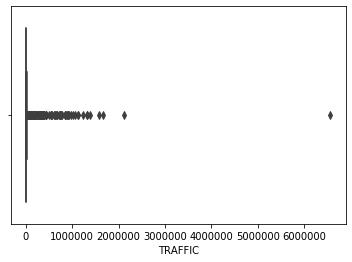

In [34]:
sns.boxplot(station_daily["TRAFFIC"]);
plt.savefig('/Users/batoul/Desktop/outlier.png')

<b> Observation:</b>  the biggest outlier is 6561761 so i will filter it out.


In [35]:
station_daily = station_daily[(station_daily["TRAFFIC"] < 6561761)]
station_daily

,STATION,DATE,TRAFFIC
0,1 AV,01/01/2021,5758.0
1,1 AV,01/02/2021,9814.0
2,1 AV,01/03/2021,7000.0
3,1 AV,01/04/2021,13495.0
4,1 AV,01/05/2021,13791.0
...,...,...,...
34382,ZEREGA AV,12/27/2020,909.0
34383,ZEREGA AV,12/28/2020,1915.0
34384,ZEREGA AV,12/29/2020,1988.0
34385,ZEREGA AV,12/30/2020,1858.0


> Now I've got the dataframe without the outlier.


### Visualizing data.

Now it is time to answer our questions!



### Q1. What are the ten most active stations?

In [36]:
Top_ten = station_daily.groupby(["STATION"]).agg({'TRAFFIC': sum}).sort_values(by = 'TRAFFIC', ascending = False).head(10)
Top_ten

,TRAFFIC
STATION,
34 ST-PENN STA,5842956.0
34 ST-HERALD SQ,5494166.0
FULTON ST,5011478.0
GRD CNTRL-42 ST,4885895.0
TIMES SQ-42 ST,4630420.0
125 ST,4532653.0
86 ST,4436397.0
PATH NEW WTC,4236617.0
42 ST-PORT AUTH,4011997.0


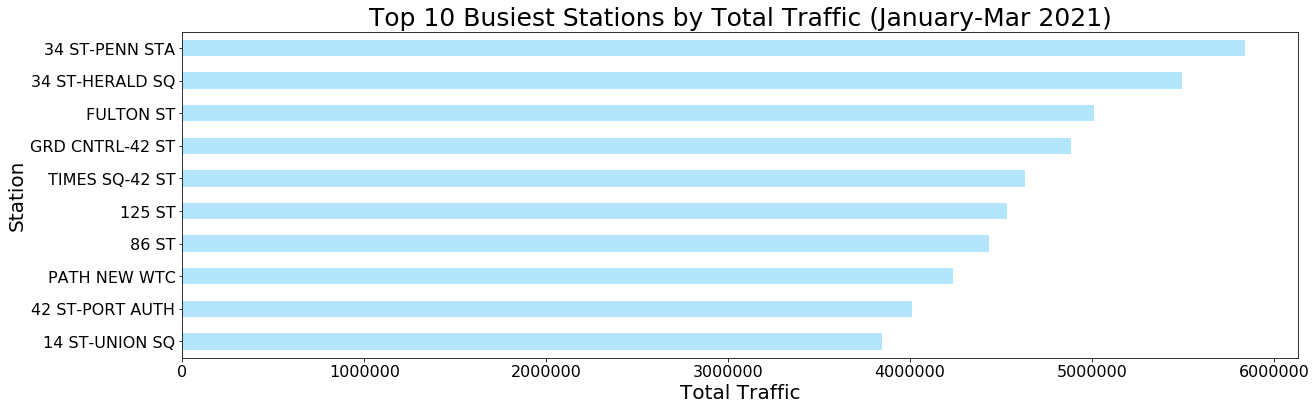

In [37]:
fig, ax = plt.subplots(figsize=(20, 6))
Top_ten.sort_values(by = 'TRAFFIC').plot(kind='barh',color='#b3e5fc',ax=ax)

#Changing font sizes 
ax.set_title('Top 10 Busiest Stations by Total Traffic (January-Mar 2021)', fontsize=25)
ax.set_xlabel('Total Traffic', fontsize=20)
ax.set_ylabel('Station', fontsize=20)
plt.rcParams['font.size'] = '10'
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)
    


ax.legend().set_visible(False)
plt.savefig('/Users/batoul/Desktop/Top10Busiest.png')

### Q2 What are the most active days of the week?


In [38]:
# lets create a seprate dataframe with only the date and traffic
week_traffic = station_daily[['DATE','TRAFFIC']]
# Now, lets change the DATE to day names 
week_traffic['Day of Week']= pd.to_datetime(week_traffic['DATE']).dt.day_name()
week_traffic.head(2)

,DATE,TRAFFIC,Day of Week
0,01/01/2021,5758.0,Friday
1,01/02/2021,9814.0,Saturday


In [39]:
weekdays= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Finally we can group by the day of week and sum the traffic 

week_traffic =week_traffic.groupby(["Day of Week"],as_index=False) ["TRAFFIC"].sum()

# Sort them to make the graph clearer

week_traffic.index = pd.CategoricalIndex(week_traffic["Day of Week"],categories=weekdays,ordered = True )

week_traffic= week_traffic.sort_index().reset_index(drop=True)

week_traffic

,Day of Week,TRAFFIC
0,Monday,42778925.0
1,Tuesday,47012551.0
2,Wednesday,48678920.0
3,Thursday,55791969.0
4,Friday,46359466.0
5,Saturday,35308321.0
6,Sunday,26925496.0


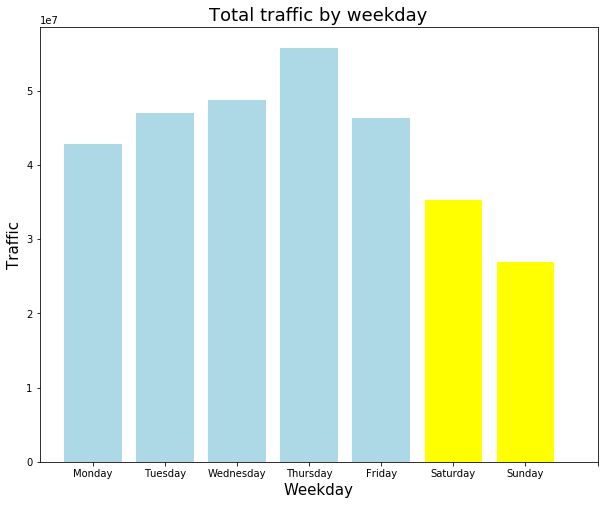

In [40]:
fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
ax.bar(week_traffic['Day of Week'], week_traffic['TRAFFIC'],color = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue','yellow','yellow'])
ax.set_xticks([x for x in range(0,8)])
ax.set_xticklabels(week_traffic['Day of Week']);
ax.set_title('Total traffic by weekday', fontsize=18)
ax.set_xlabel('Weekday', fontsize=15)
ax.set_ylabel('Traffic', fontsize=15);
plt.savefig('/Users/batoul/Desktop/Total traffic by weekday.png')

<b>Observation:</b> Most active days are Wednesday and Thursday,It gets less by the weekends.

### Q3 :What are the most active times for each station?


In [41]:
top_stations=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST','GRD CNTRL-42 ST','TIMES SQ-42 ST','125 ST','86 ST','PATH NEW WTC','42 ST-PORT AUTH','14 ST-UNION SQ']

In [42]:
MTA_Traffic_per_hour = turnstiles_df[turnstiles_df['STATION'].isin(top_stations)]
MTA_Traffic_per_hour

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,tunr_id,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
174676,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,13:00:00,REGULAR,245753199,2021-03-26 13:00:00,R305R20601-00-02125 ST,245753484.0,285.0,217.0,502.0
174675,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,09:00:00,REGULAR,245753068,2021-03-26 09:00:00,R305R20601-00-02125 ST,245753199.0,131.0,160.0,291.0
174674,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,05:00:00,REGULAR,245752994,2021-03-26 05:00:00,R305R20601-00-02125 ST,245753068.0,74.0,111.0,185.0
174673,R305,R206,01-00-02,125 ST,23,IRT,03/26/2021,01:00:00,REGULAR,245752994,2021-03-26 01:00:00,R305R20601-00-02125 ST,245752994.0,0.0,0.0,0.0
174672,R305,R206,01-00-02,125 ST,23,IRT,03/25/2021,21:00:00,REGULAR,245752973,2021-03-25 21:00:00,R305R20601-00-02125 ST,245752994.0,21.0,36.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512404,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,19:00:00,REGULAR,9854006,2020-12-26 19:00:00,A021R03201-00-00TIMES SQ-42 ST,9854085.0,79.0,104.0,183.0
2512403,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,15:00:00,REGULAR,9853859,2020-12-26 15:00:00,A021R03201-00-00TIMES SQ-42 ST,9854006.0,147.0,243.0,390.0
2512402,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,11:00:00,REGULAR,9853782,2020-12-26 11:00:00,A021R03201-00-00TIMES SQ-42 ST,9853859.0,77.0,256.0,333.0
2512401,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,12/26/2020,07:00:00,REGULAR,9853731,2020-12-26 07:00:00,A021R03201-00-00TIMES SQ-42 ST,9853782.0,51.0,151.0,202.0


In [43]:
bins = [0, 5, 13, 17, 25]
time_periods = ['Morning','Afternoon','Evening','Night']
hours = MTA_Traffic_per_hour['DATE_TIME'].dt.hour
MTA_Traffic_per_hour['TIME_PERIOD'] = pd.cut(hours-5+24 *(hours<5), bins=bins, labels=time_periods, right=False)

/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


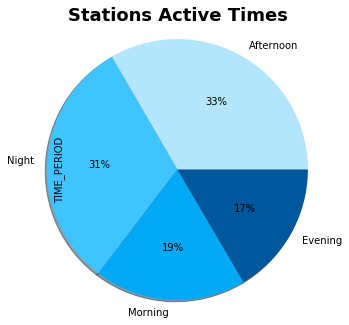

In [44]:
#plot pie chart of day type column
colors =["#b3e5fc","#40c4ff","#03a9f4","#01579b"]
data = MTA_Traffic_per_hour['TIME_PERIOD'].value_counts()

data.plot.pie(autopct='%.0f%%', colors = colors ,radius=1.5, shadow=True )
plt.rcParams['font.size'] = 15
plt.title('Stations Active Times',  pad=40, fontweight='bold')
plt.savefig('/Users/batoul/Desktop/StationsActiveTimes.png')

<b>Observation:</b> Many turnstiles accrues at Night and Afternoon.

### Conclusion and recommendation

<p>Based on the above analysis, it is necessary to increase the sterilization tours in the ten stations, which are:
34 ST-PENN STA,34 ST-HERALD SQ,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST,125 ST,86 ST,PATH NEW WTC,42 ST-PORT AUTH and 14 ST-UNION SQ.
</p>
<p>
We can focus in the extra tours on weekdays rather than weekends and also afternoons and evenings when they are more busiest station.</p>

### Reference

<li><a id='https://magreen.medium.com/new-york-mta-challenge-a-data-science-story-e9179b869057'> https://magreen.medium.com/new-york-mta-challenge-a-data-science-story-e9179b869057</a></li>
    
<li><a id='https://github.com/noahhalpern/metis_projects/blob/master/nyc_subway/nyc_subway_eda.ipynb'> https://github.com/noahhalpern/metis_projects/blob/master/nyc_subway/nyc_subway_eda.ipynb</a></li>
    
<li><a id='http://www.columbia.edu/~yh2693/MTA_data.html'> http://www.columbia.edu/~yh2693/MTA_data.html</a></li>

<li><a id='https://medium.com/@sitingkoh1808/metis-project-1-exploratory-data-analysis-eda-on-mta-turnstile-data-b139549892a'> https://medium.com/@sitingkoh1808/metis-project-1-exploratory-data-analysis-eda-on-mta-turnstile-data-b139549892a</a></li>


